# Problem Statement

### Business Use Case
SafeTravel Inc. is one of the world's largest insurance companies specializing in travel insurance. During
travel, there are a lot of risk factors - loss of baggage, airline cancellations, health issues etc. The potential
customers are travellers who want to insure themselves against travel-related risks. They have different
product offerings like 1-way travel insurance, 2-way insurance, insurance against cancellations and so on.
They receive thousands of claims spread across different products.
Wrongly denying a genuine claim could lead to lawsuits against the company and approving the wrong
claim would lead to a loss. Automatically predicting the claims could lead to a lot of benefits and solve
some other supplementary problems too. As a team of data scientists consulting for SafeTravel Inc, you
are now responsible for meeting their business outcome.

### Problem Statement
Insurance companies take risks over customers. Risk management is a very
important aspect of the insurance industry. Insurers consider every
quantifiable factor to develop profiles of high and low insurance risks. Insurers
collect vast amounts of information about policyholders and analyze the data.

### Data Science Problem Statement
As a Data scientist in an insurance company, we need to analyze the
available data and predict whether to sanction the insurance or not.

### Evalution Metric
The evaluation metric for this task will be [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html).

# Understanding the Dataset

The training dataset consists of data corresponding to 52310 customers and the
test dataset consists of 22421 customers.

**Features**
- Target: Claim Status (Claim)
- Name of agency (Agency)
- Type of travel insurance agencies (Agency.Type)
- Distribution channel of travel insurance agencies (Distribution.Channel)
- Name of the travel insurance products (Product.Name)
- Duration of travel (Duration)
- Destination of travel (Destination)
- Amount of sales of travel insurance policies (Net.Sales)
- The commission received for travel insurance agency (Commission)
- Age of insured (Age)
- The identification record of every observation (ID)

## Import Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# Scipy libraries
from scipy.stats import shapiro
from scipy.stats import skew
from scipy.stats import normaltest
from scipy.stats import kurtosis
from scipy.stats import pearsonr
from statsmodels.graphics.gofplots import qqplot

# train test split
from sklearn.model_selection import train_test_split

# Ml Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier
#from xgboost import XGBClassifier

# Score
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,classification_report,confusion_matrix

# Upsampling
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

# Feature Selection
from sklearn.feature_selection import SelectKBest,mutual_info_classif,RFECV

# Model Selection
from sklearn.model_selection import RandomizedSearchCV

# outliers handler
from scipy.stats.mstats import winsorize

# Pipeline
from sklearn.pipeline import Pipeline

## Load Train Dataset

In [3]:
data=pd.read_csv("Data/train.csv")
data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


## Inspect Data

In [3]:
# Columns Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
ID                      52310 non-null int64
Agency                  52310 non-null object
Agency Type             52310 non-null object
Distribution Channel    52310 non-null object
Product Name            52310 non-null object
Duration                52310 non-null int64
Destination             52310 non-null object
Net Sales               52310 non-null float64
Commision (in value)    52310 non-null float64
Age                     52310 non-null int64
Claim                   52310 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [4]:
# Numerical Columns
data.describe(exclude='object')

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


In [5]:
# Categorical Columns
data.describe(include='object')

,Agency,Agency Type,Distribution Channel,Product Name,Destination
count,52310,52310,52310,52310,52310
unique,16,2,2,25,97
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
freq,26218,34996,51419,13254,14242


#### Check all numerical datatype columns unique values whether converting numerical datatype to categorical datatype 

In [6]:
# No of Unique Value in Numerical Columns
for i in data.describe(exclude='object').columns:
    print(f'{i} : {data[i].nunique()}')

ID : 7992
Duration : 439
Net Sales : 6700
Commision (in value) : 5101
Age : 99
Claim : 2


## Basic Data Cleaning

In [7]:
# drop ID column in dataset
data.drop(columns='ID',inplace=True)

Convert Claim feature and All categorical feature into category data type

In [8]:
category_columns=list(data.describe(include='object').columns)

In [9]:
category_columns.append('Claim')

In [10]:
category_columns

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Destination',
 'Claim']

In [11]:
def dtype_cat(df,col_list):
    for i in col_list:
        df[i]=df[i].astype('category')

In [12]:
dtype_cat(data,category_columns)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 10 columns):
Agency                  52310 non-null category
Agency Type             52310 non-null category
Distribution Channel    52310 non-null category
Product Name            52310 non-null category
Duration                52310 non-null int64
Destination             52310 non-null category
Net Sales               52310 non-null float64
Commision (in value)    52310 non-null float64
Age                     52310 non-null int64
Claim                   52310 non-null category
dtypes: category(6), float64(2), int64(2)
memory usage: 1.9 MB


## EDA

### Univariate Analysis

In [14]:
num_col=data.describe(exclude='category').columns

#### Univariate analysis on Numerical Column
after performing univariate analysis on numerical columns we can find distribution of data using histrogram and find outliers using boxplot

In [15]:
def num_bivariate(df,col):
    mean=df[col].mean()
    median=df[col].median()
    Q1=np.nanpercentile(df[col],0.25)
    Q3=np.nanpercentile(df[col],0.75)
    min=df[col].min()
    max=df[col].max()

    Skewness=skew(df[col])
    Kurtosis=kurtosis(df[col])
    Shapiro=shapiro(df[col])
    #z_statistics,p=normaltest(df[col])
    normality_test=normaltest(df[col])
    # if p<0.05:
    #     normality_test='reject null hypothesis (H0). not normaly distributed' # not normaly distributed
    # else:
    #     normality_test='faild to reject null hypothesis (H0) assume alternate hypothesis (H1). correct normaly distributed' # normaly distributed
    
    print('Column Name : {}'.format(col))
    print('Mean : {}'.format(mean))
    print('Median : {}'.format(median))
    print('Quartile 1 : {}'.format(Q1))
    print('Quartile 3 : {}'.format(Q3))
    print('Minimun : {}'.format(min))
    print('Maximum : {}'.format(max))
    print('Skewness : {}'.format(Skewness))
    print('Kurtosis : {}'.format(Kurtosis))
    print('Shapiro : {}'.format(Shapiro))
    print('Normality Test : {}'.format(normality_test))

    dynamic_bins=int(np.cbrt(len(df[col]))*2)

    plt.figure(figsize=(15,8))
    sns.distplot(df[col],bins=dynamic_bins)
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median, color='g', linestyle='-')
    plt.show()
    plt.figure(figsize=(15,8))
    sns.boxplot(df[col])
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median, color='g', linestyle='-')
    plt.show()

Column Name : Duration
Mean : 58.2561078187727
Median : 24.0
Quartile 1 : 1.0
Quartile 3 : 1.0
Minimun : -2
Maximum : 4881
Skewness : 15.352083357535523
Kurtosis : 600.5460109498088
Shapiro : (0.43224626779556274, 0.0)
Normality Test : NormaltestResult(statistic=102955.18982399761, pvalue=0.0)


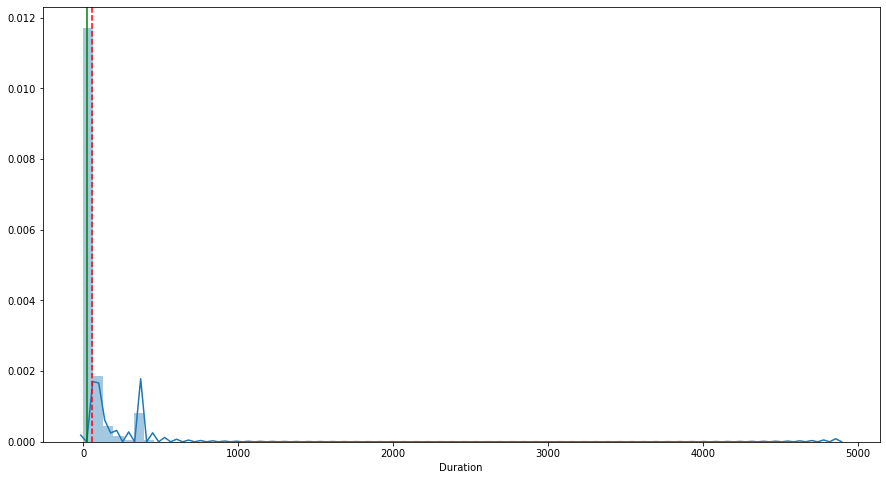

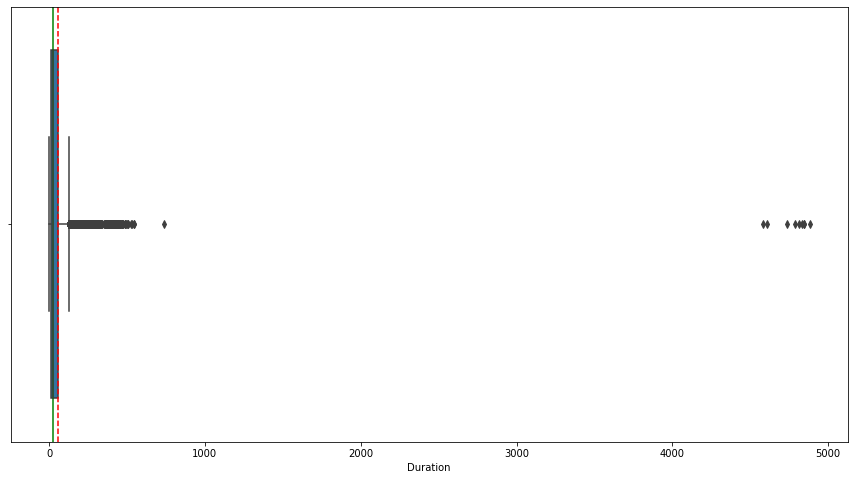

Column Name : Net Sales
Mean : 48.55467307386593
Median : 29.5
Quartile 1 : -69.3
Quartile 3 : -25.047775
Minimun : -389.0
Maximum : 682.0
Skewness : 2.8117567073906704
Kurtosis : 10.873900849140409
Shapiro : (0.6663482189178467, 0.0)
Normality Test : NormaltestResult(statistic=31630.638183395648, pvalue=0.0)


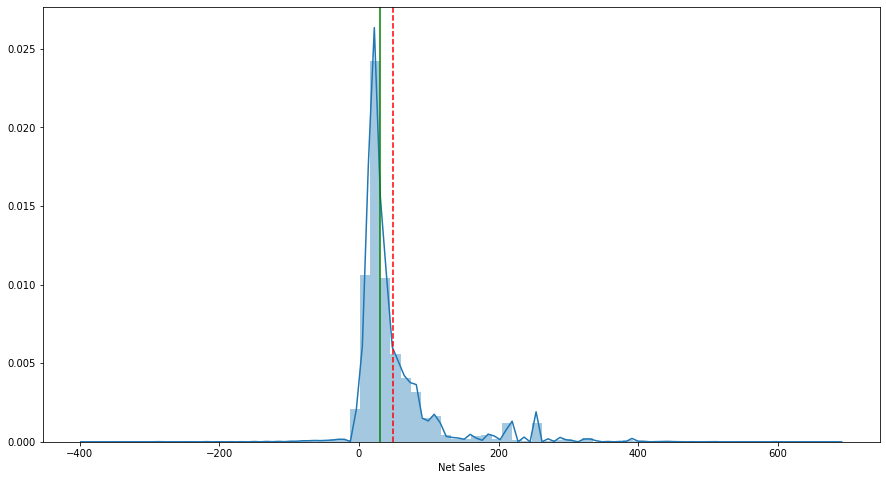

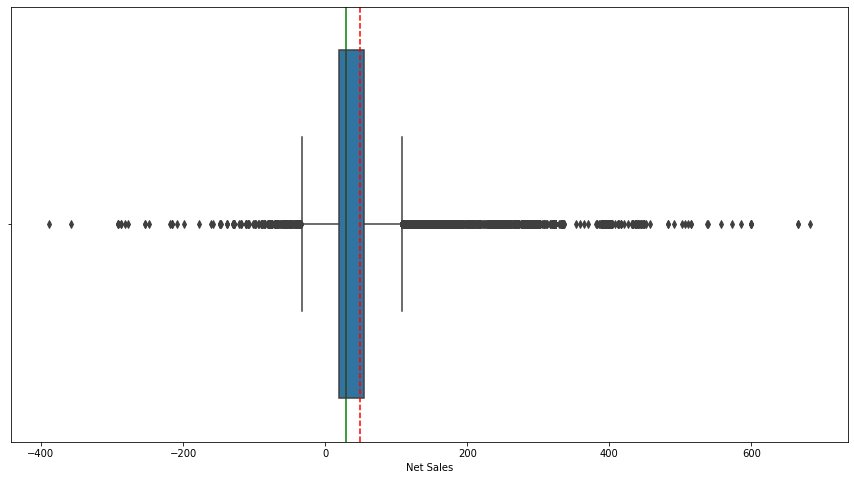

Column Name : Commision (in value)
Mean : 12.219963276202897
Median : 0.0
Quartile 1 : 0.0
Quartile 3 : 0.0
Minimun : 0.0
Maximum : 262.76
Skewness : 3.5355929571079447
Kurtosis : 18.360208138788757
Shapiro : (0.5847123861312866, 0.0)
Normality Test : NormaltestResult(statistic=39687.0008948467, pvalue=0.0)


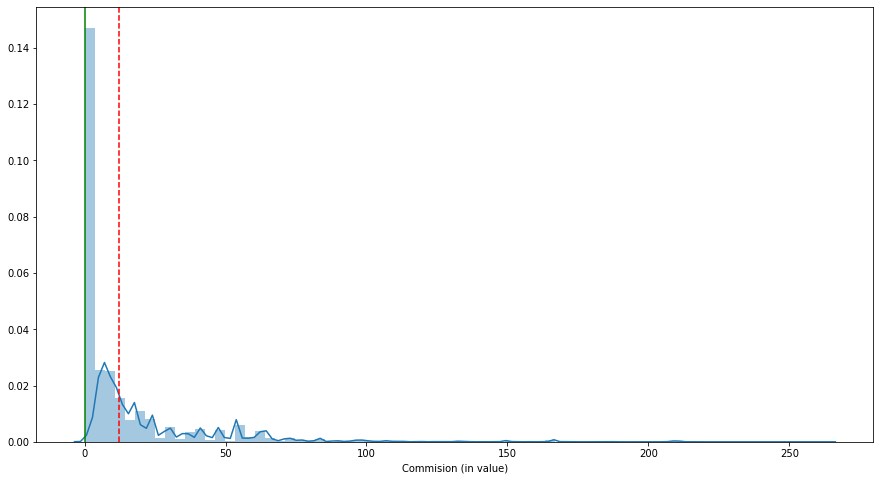

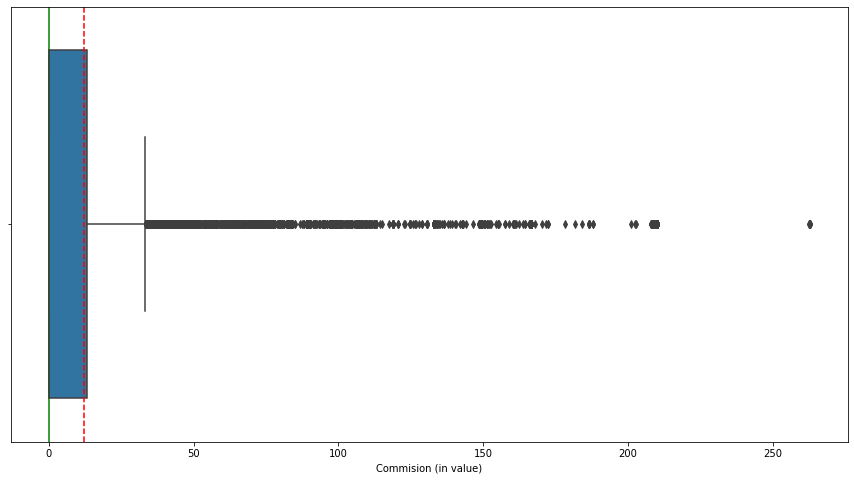

Column Name : Age
Mean : 39.555725482699295
Median : 36.0
Quartile 1 : 18.0
Quartile 3 : 21.0
Minimun : 0
Maximum : 118
Skewness : 2.9478066507321383
Kurtosis : 13.138684218272495
Shapiro : (0.7295069694519043, 0.0)
Normality Test : NormaltestResult(statistic=33659.25917590532, pvalue=0.0)


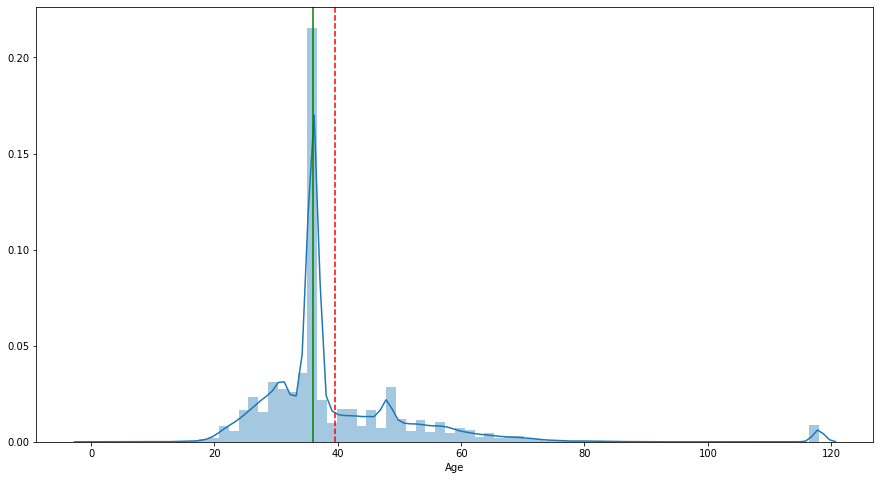

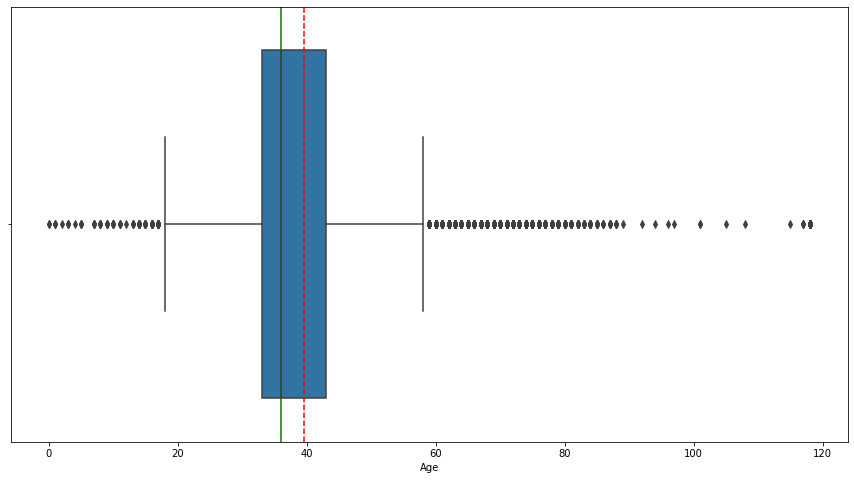

In [16]:
for i in num_col:
    num_bivariate(data,i)

**observation**
- we can see all numerical columns are heavily skewed and this is due to the presence of outliers.
- we can handle outliers in the following steps.

#### Univariate analysis on Categorical Column
after performing univariate analysis on numerical columns we can find distribution of data using histrogram and find outliers using boxplot

In [17]:
cat_col=data.describe(include='category').columns

In [18]:
def cat_univariate(df,col):
    fig=plt.figure(figsize=(17,6))
    fig.suptitle('Plots of {} column'.format(col))
    val_cnt=df[col].value_counts().sort_values(ascending=False)
    plt.bar(val_cnt.index,val_cnt)
    plt.title('Bar-Graph')
    plt.xticks(rotation=90)
    fig.show()

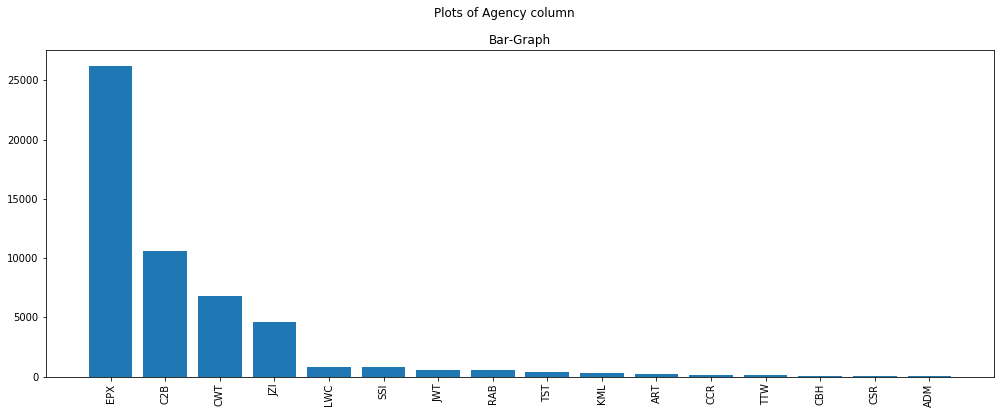

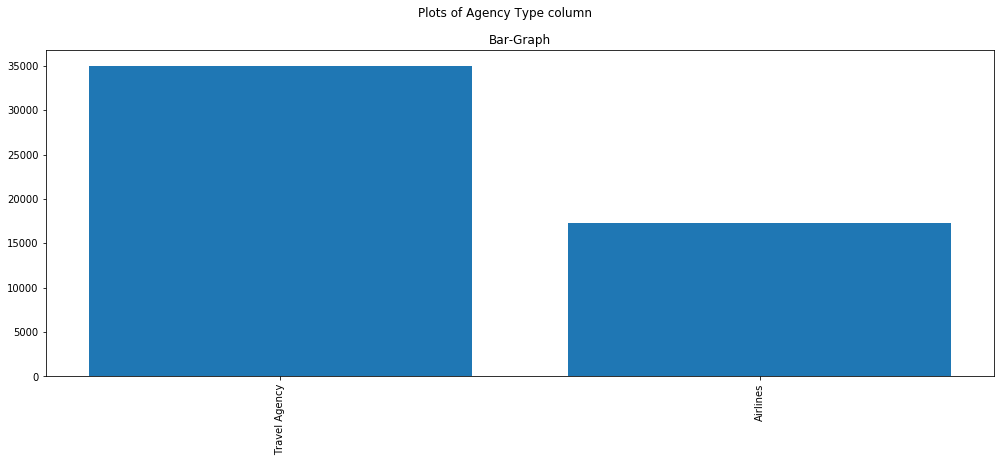

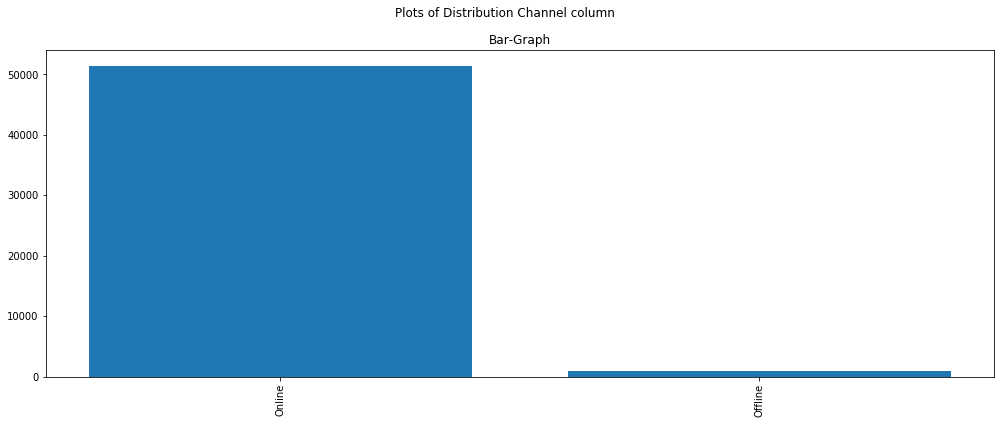

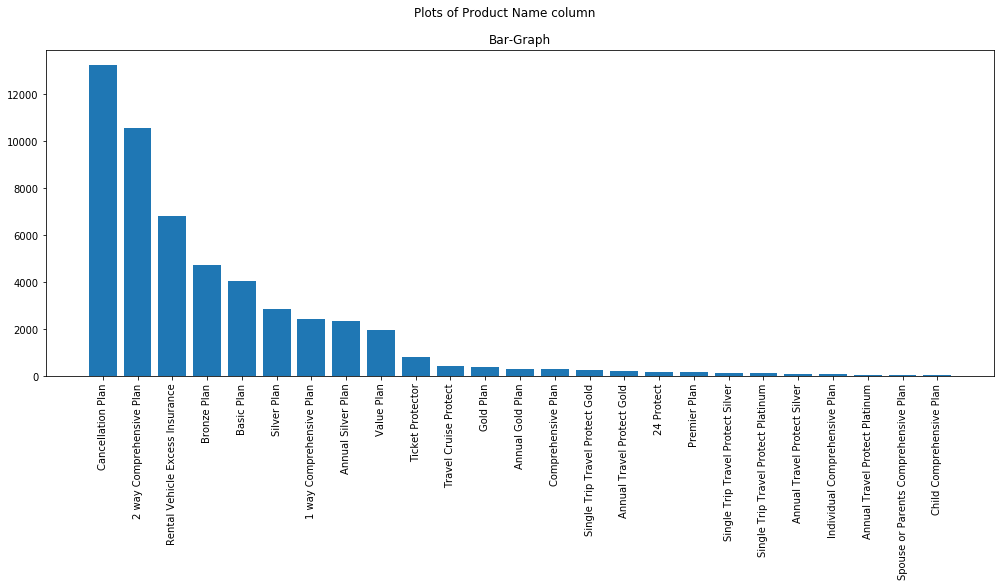

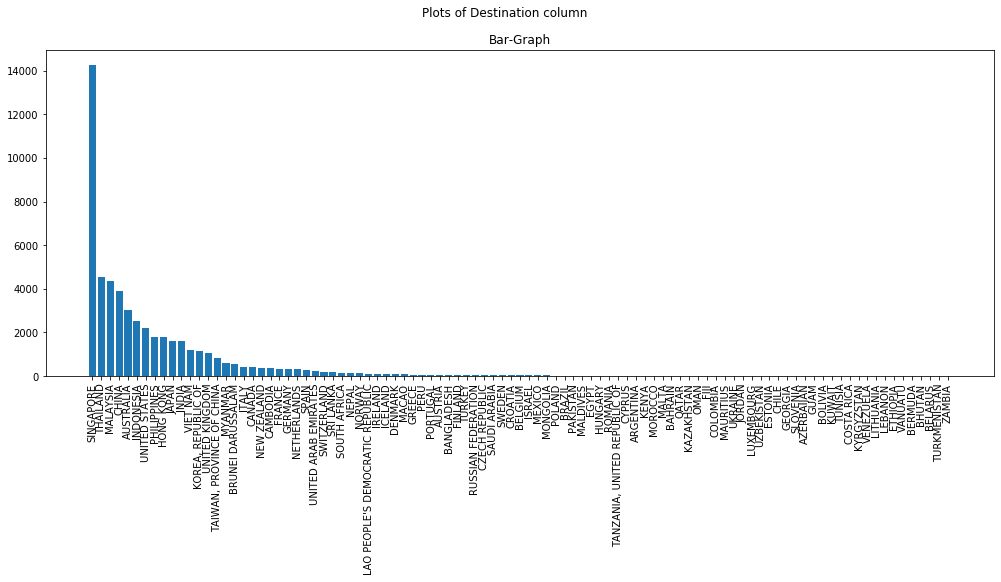

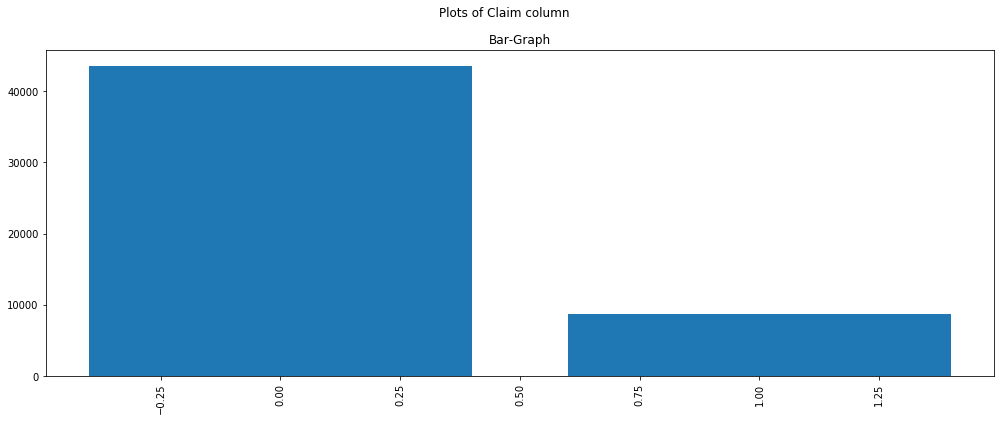

In [19]:
for i in cat_col:
    cat_univariate(data,i)

**observation**
- EPX Agency Count is high in Agency feature
- Travel Agency claims are higher than Airlines
- Offline Insurance distribution count is very low
- Cancelation Plan Insurance Claim is high
- Signapur destrination is largest insurance claim country
- our target variable Claim approval rate is below 20%

## Bivariate Analysis

#### Checking Correlation

In [20]:
# find multi-collinearity in numerical columns
data[num_col].corr()

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.595261,0.483148,-0.003969
Net Sales,0.595261,1.000000,0.733110,0.022606
Commision (in value),0.483148,0.733110,1.000000,0.087455
Age,-0.003969,0.022606,0.087455,1.000000


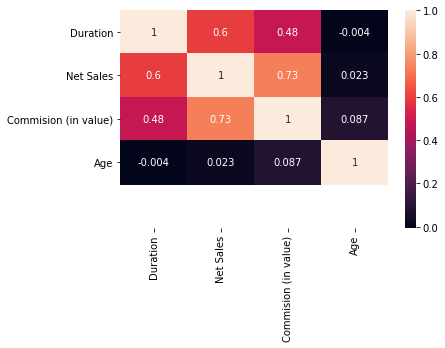

In [21]:
sns.heatmap(data[num_col].corr(),annot=True)
plt.ylim(5.0,0.0)
plt.show()

**observation**
- high correlation between Commision & Net Sales
- drop one column

#### Check Claim feature according to Product Name

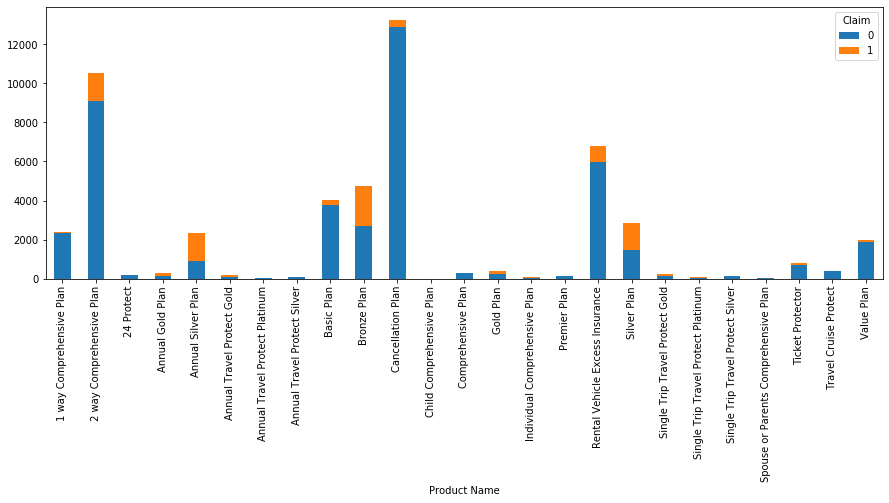

In [22]:
data.groupby('Product Name')['Claim'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(15,5))
plt.show()

**observation**
- Cancellation Plan has overall maximum claims
- Approval (1) rate is high on Bronze Plane
- Rejection (0) rate is high on Cancellation Plan

#### Which Product Policies ammount is high

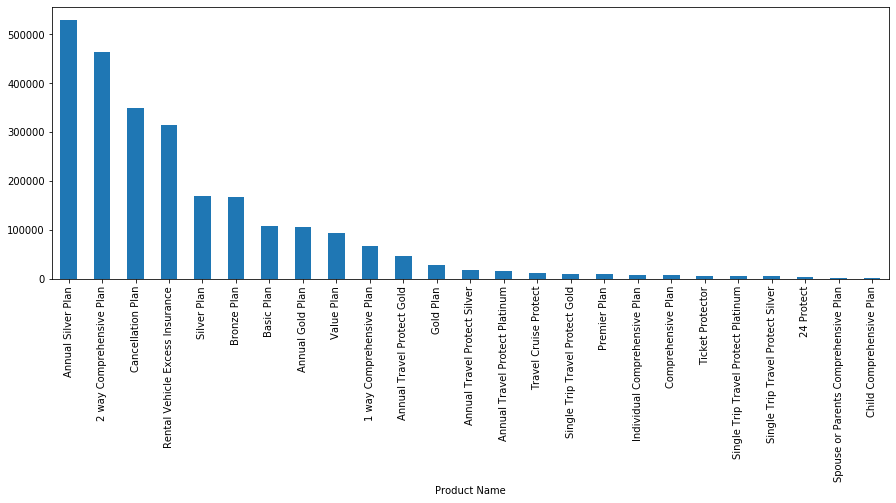

In [23]:
data.groupby('Product Name')['Net Sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.show()

**observation**
- Annual Silver Plan Net Sales is Maximum
- Child Comprehensive Plan Net Sales is Minimum

### Multivariate Analysis

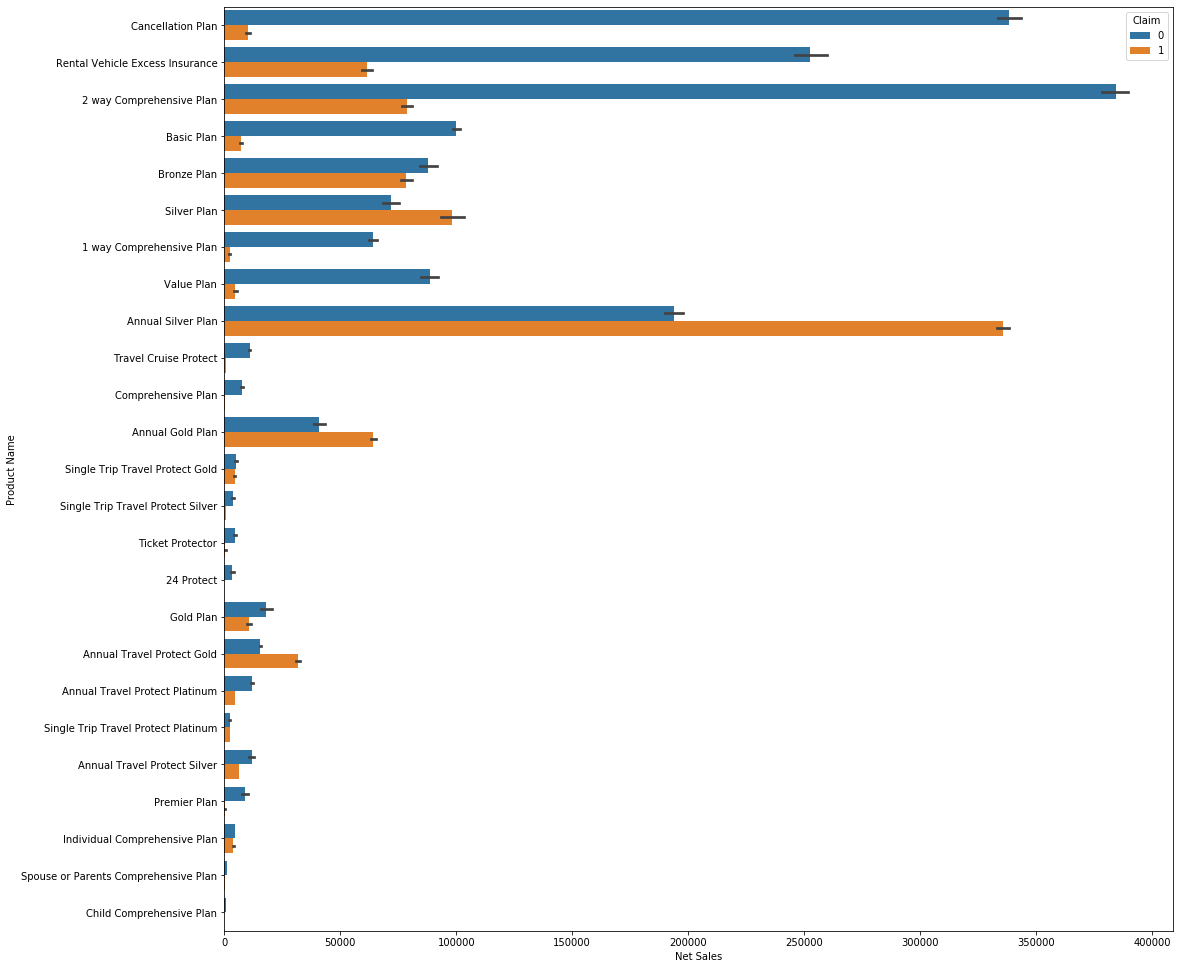

In [7]:
plt.figure(figsize=(17,17))
d=data.sort_values("Net Sales").reset_index(drop=True)
sns.barplot(y="Product Name", x="Net Sales", hue="Claim", data=data, estimator=sum)
#d.plot(kind="barh",x="Net Sales",y="Product Name")
plt.show()

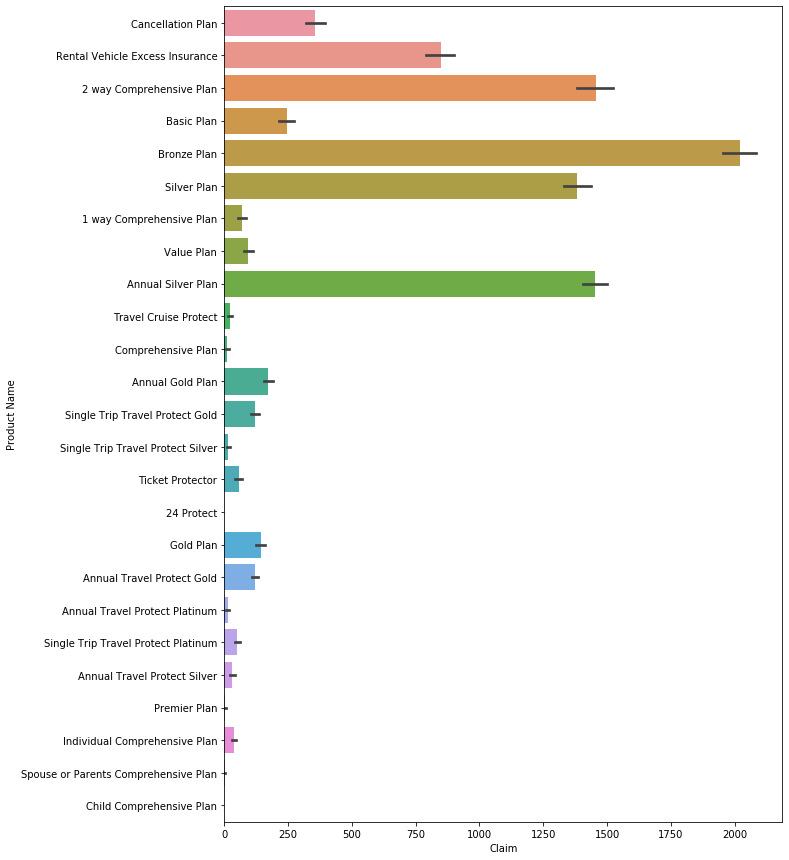

In [4]:
plt.figure(figsize=(10,15))
sns.barplot(y="Product Name", x="Claim", data=data, estimator=sum)
plt.show()

**observation**
- Bronze Plan has the highest number of sanctioned claims

#### Products with highest Claims aproved
- Annual Gold Plan has 58% claims approved
- Annual Silver Plan has 61.7% claims approved
- Annual Travel Protect Gold has 65.5% claims approved
- Bronze Plan has 42.7% Individual
- Comprehensive Plan has 44% 
- Silver Plan has 48% 
- Single Trip Travel Protect 
- Gold 48% 
- Single Trip Travel Protect Platinum 50%

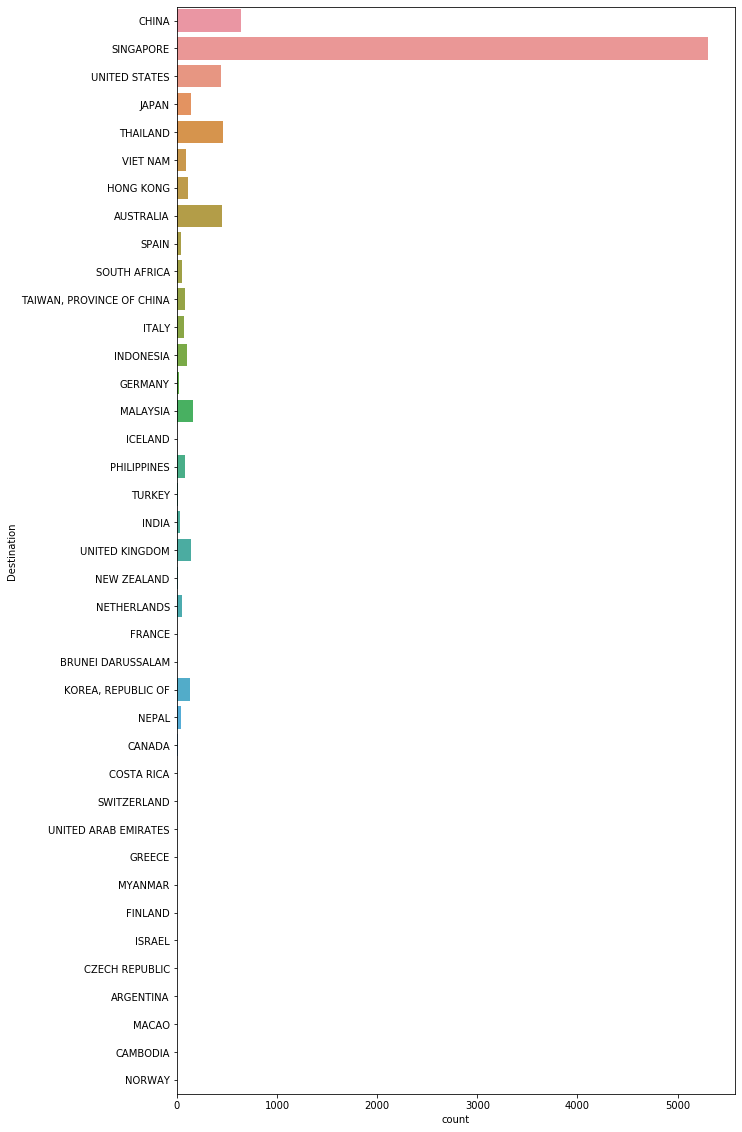

In [7]:
s=data[data["Claim"]==1]
plt.figure(figsize=(10,20))
a=pd.DataFrame((s["Destination"].value_counts()).nlargest(15))
sns.countplot(y="Destination",data=s)
plt.show()

**observation**
- Asia has the highest number of claims. 
- Singapore is the leading Destination is claims.

## Check data is imbalance or not

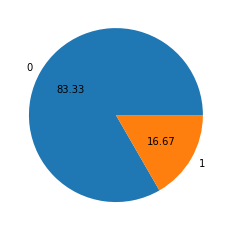

In [24]:
plt.pie(data['Claim'].value_counts(),labels=[0,1],autopct='%2.2f')
plt.show()

**observation**
- data is imbalance
- we need to resample our train data for improve model performance

# Vanilla Method
Apply several machnine learning model to data without any data modification

In [25]:
# Apply get dummies on data
data=pd.get_dummies(data,columns=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name','Destination'],drop_first=True)
data.shape

(52310, 142)

In [26]:
# Split data to Independent Variable and Dependent Variable
X=data.drop(columns='Claim')
y=data['Claim']

In [27]:
# Create training data nd testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,train_size=0.7)

In [28]:
X_train.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_TURKMENISTAN,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
6218,46,10.0,0.0,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6316,38,16.0,4.0,19,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17271,76,33.0,0.0,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32688,62,12.0,0.0,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29068,116,120.0,0.0,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Training

In [29]:
# Initialize Models
lr=LogisticRegression()
dt=DecisionTreeClassifier()
edt=ExtraTreesClassifier()
rf=RandomForestClassifier()
vc_hard=VotingClassifier(estimators=[('rf',rf),('lr',lr)])
vc_soft=VotingClassifier(estimators=[('rf',rf),('lr',lr)],voting='soft')
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()

In [30]:
models={
    lr:'LogisticRegression',
    dt:'DecisionTreeClassifier',
    edt:'ExtraTreesClassifier',
    rf:'RandomForestClassifier',
    vc_hard:'VotingClassifier-Hard',
    vc_soft:'VotingClassifier-Soft',
    gbc:'GradientBoostingClassifier',
    xgb:'XGBClassifier'
}

In [31]:
def model_train(model_dict,X_train,X_test,y_train,y_test):
    result=[]
    for model in model_dict:
        result_dict={}
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        result_dict['Model']=model_dict[model]
        result_dict['Precision Score']=precision_score(y_test,y_pred)
        result_dict['Recall Score']=recall_score(y_test,y_pred)
        result_dict['Accuracy Score']=accuracy_score(y_test,y_pred)
        result_dict['F1 Score']=f1_score(y_test,y_pred)
        result.append(result_dict)
    return pd.DataFrame(result)

In [32]:
vanila_result=model_train(models,X_train,X_test,y_train,y_test)
vanila_result

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score
0,LogisticRegression,0.610130,0.304132,0.851717,0.405923
1,DecisionTreeClassifier,0.736162,0.763198,0.914994,0.749437
2,ExtraTreesClassifier,0.815342,0.788829,0.935067,0.801867
3,RandomForestClassifier,0.823813,0.783474,0.936022,0.803137
4,VotingClassifier-Hard,0.808824,0.273527,0.868222,0.408805
5,VotingClassifier-Soft,0.823500,0.635425,0.916587,0.717340
6,GradientBoostingClassifier,0.640496,0.415073,0.863761,0.503714
7,XGBClassifier,0.787495,0.688982,0.917224,0.734952


**obervation**
- ensemble models score is high compare to other models
- check our observation after handeling imbalance data, outliers and doing some feature engineering

# Feature Engineering

## 1. Handle Imbalance Data

### Upsampling
we use two types of upsampling libraries(SMOTETomek,RandomOverSampler) on vanilla method data.

#### SMOTETomek

In [33]:
smk=SMOTETomek(random_state=0)
X_train_smk,y_train_smk=smk.fit_sample(X_train,y_train)
X_train_smk.shape,y_train_smk.shape

((60462, 141), (60462,))

In [34]:
vanila_result_SMOTETomek=model_train(models,X_train_smk,X_test,y_train_smk,y_test)
vanila_result_SMOTETomek

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score
0,LogisticRegression,0.411345,0.771232,0.778054,0.536527
1,DecisionTreeClassifier,0.719316,0.820581,0.916778,0.766619
2,ExtraTreesClassifier,0.773315,0.846978,0.933155,0.808472
3,RandomForestClassifier,0.771300,0.855394,0.933665,0.811174
4,VotingClassifier-Hard,0.777162,0.697781,0.916332,0.735336
5,VotingClassifier-Soft,0.656323,0.865723,0.902122,0.746618
6,GradientBoostingClassifier,0.436805,0.811783,0.794303,0.567987
7,XGBClassifier,0.568744,0.879878,0.868859,0.690898


#### RandomOverSampler

In [35]:
rof=RandomOverSampler()
X_train_rof,y_train_rof=rof.fit_sample(X_train,y_train)
X_train_rof.shape,y_train_rof.shape

((61022, 141), (61022,))

In [36]:
vanila_result_RandomOverSampler=model_train(models,X_train_rof,X_test,y_train_rof,y_test)
vanila_result_RandomOverSampler

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score
0,LogisticRegression,0.411889,0.744836,0.780348,0.530445
1,DecisionTreeClassifier,0.751402,0.768936,0.919136,0.760068
2,ExtraTreesClassifier,0.806576,0.797628,0.934429,0.802077
3,RandomForestClassifier,0.784846,0.840092,0.935003,0.811530
4,VotingClassifier-Hard,0.796193,0.656083,0.914739,0.719379
5,VotingClassifier-Soft,0.684450,0.863810,0.910979,0.763741
6,GradientBoostingClassifier,0.467379,0.819434,0.814376,0.595248
7,XGBClassifier,0.604156,0.912012,0.885809,0.726829


**observation**
- not major differance in both upsampling technique
- use RandomOverSampler sampling Technique
- DecisionTreeClassifier,RandomForestClassifier and VotingClassifier(Hard) models score is good

## 2. Feature Selection

In [37]:
data=pd.read_csv('Data/train.csv')
data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [38]:
# drop ID Column
data.drop(columns='ID',inplace=True)

# drop Commission Column due to multicollinearity
data.drop(columns='Commision (in value)',inplace=True)

In [39]:
# # Convert negative values in Net Sales to 0
# data['Net Sales']=data['Net Sales'].map(lambda x:x if x>0 else 0)fid 

In [40]:
# Reduce Destination Value Count
country=data['Destination'].value_counts()
country_list=list(country[country>50].index)
data['Destination']=data['Destination'].map(lambda x:x if x in country_list else 'OTHER')

In [41]:
# create independent variable and target variable
X=data.drop(columns='Claim')
y=data['Claim']

In [42]:
# create dummy variables for categorical data
cat_cols=list(X.describe(include='object').columns)
X=pd.get_dummies(X,columns=cat_cols,drop_first=True)
cat_cols

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Destination']

In [43]:
# split data into training set and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [44]:
# without over sampling
model_train(models,X_train,X_test,y_train,y_test)

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score
0,LogisticRegression,0.604743,0.292655,0.850315,0.394432
1,DecisionTreeClassifier,0.737998,0.758607,0.914930,0.748161
2,ExtraTreesClassifier,0.796311,0.776205,0.929650,0.786129
3,RandomForestClassifier,0.801823,0.773910,0.930479,0.787619
4,VotingClassifier-Hard,0.787600,0.262433,0.865354,0.393687
5,VotingClassifier-Soft,0.795988,0.622418,0.910533,0.698583
6,GradientBoostingClassifier,0.639057,0.404361,0.862741,0.495314
7,XGBClassifier,0.778757,0.675976,0.914038,0.723735


In [45]:
# with over sampling
rof=RandomOverSampler()
X_train_rof,y_train_rof=rof.fit_sample(X_train,y_train)
X_train_rof.shape,y_train_rof.shape

((61022, 88), (61022,))

In [46]:
model_train(models,X_train_rof,X_test,y_train_rof,y_test)

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score
0,LogisticRegression,0.418143,0.740627,0.785127,0.534511
1,DecisionTreeClassifier,0.741947,0.766641,0.916714,0.754092
2,ExtraTreesClassifier,0.785168,0.785769,0.928503,0.785468
3,RandomForestClassifier,0.762206,0.830145,0.928567,0.794726
4,VotingClassifier-Hard,0.767946,0.650727,0.909068,0.704494
5,VotingClassifier-Soft,0.660646,0.853481,0.902568,0.744784
6,GradientBoostingClassifier,0.454584,0.823259,0.806028,0.585738
7,XGBClassifier,0.596187,0.921194,0.882941,0.723884


**observation**
- DecisionTreeClassifier,ExtraTreesClassifier,RandomForestClassifier,VotingClassifier(Hard) models Precision Score is higher than other models

In [47]:
# handel outliers
data=pd.read_csv('Data/train.csv')

data.drop(columns='ID',inplace=True)

data.drop(columns='Commision (in value)',inplace=True)

num_cols=list(data.describe(exclude='object').columns)
num_cols.pop()

# detect outliers
for i in data.describe(exclude='object').columns:
    data[i]=winsorize(data[i], limits=[0.05, 0.1],inclusive=(True, True))

# Reduce Destination Value Count
country=data['Destination'].value_counts()
country_list=list(country[country>50].index)
data['Destination']=data['Destination'].map(lambda x:x if x in country_list else 'OTHER')

X=data.drop(columns='Claim')
y=data['Claim']

cat_col=list(X.describe(include='object').columns)

X=pd.get_dummies(X,columns=cat_col,drop_first=True)

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

# simple model run with over sampling
rof=RandomOverSampler()

X_train_rof,y_train_rof=rof.fit_resample(X_train,y_train)

In [48]:
model_train(models,X_train_rof,X_test,y_train_rof,y_test)

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score
0,LogisticRegression,0.398794,0.784621,0.767094,0.528813
1,DecisionTreeClassifier,0.677804,0.783856,0.901931,0.726982
2,ExtraTreesClassifier,0.727241,0.794568,0.916141,0.759415
3,RandomForestClassifier,0.703140,0.830910,0.913401,0.761704
4,VotingClassifier-Hard,0.702850,0.688600,0.899637,0.695652
5,VotingClassifier-Soft,0.646482,0.857689,0.898171,0.737257
6,GradientBoostingClassifier,0.453373,0.807192,0.805773,0.580627
7,XGBClassifier,0.588264,0.916603,0.879246,0.716614


**observation**
- DecisionTreeClassifier,ExtraTreesClassifier,RandomForestClassifier,VotingClassifier(Hard) models Precision Score is higher than other models

### Apply SelectKBest model with mutual_info_classif
find best feature count for models and compare precision score

In [49]:
# create model dictionary
models={
    dt:'DecisionTreeClassifier',
    edt:'ExtraTreesClassifier',
    rf:'RandomForestClassifier',
    vc_hard:'VotingClassifier-Hard'
}

In [50]:
# best feture count for over sampling data 
mic=SelectKBest(score_func=mutual_info_classif,k='all')
mic.fit(X_train_rof,y_train_rof)
X_train_mic=mic.transform(X_train_rof)
X_test_mic=mic.transform(X_test)
score_sr=pd.Series(mic.scores_,index=[i for i in X_train.columns])
score_sr=score_sr.sort_values(ascending=False)
print(score_sr[score_sr>0].shape)
model_train(models,X_train_mic,X_test_mic,y_train_rof,y_test)

(64,)


,Model,Precision Score,Recall Score,Accuracy Score,F1 Score
0,DecisionTreeClassifier,0.681034,0.785769,0.903014,0.729663
1,ExtraTreesClassifier,0.721351,0.792272,0.914420,0.755150
2,RandomForestClassifier,0.704780,0.834736,0.914229,0.764273
3,VotingClassifier-Hard,0.700625,0.686687,0.898936,0.693586


**observation**
- notice small difference in Precision Score after appling SelectKBest model using mutual_info_classif as a score functionfun

# Hyperparameter Tuning
Hyperparameter tuning for above 4 models to compare result

### Decision Tree

In [51]:
dt_param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [52]:
rsc=RandomizedSearchCV(dt,param_distributions=dt_param_grid,cv=5)

In [54]:
rsc.fit(X_train_mic,y_train_rof)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [55]:
rsc.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_leaf_nodes': None,
 'max_depth': None,
 'criterion': 'gini'}

In [70]:
# best parameters
'''
{'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_leaf_nodes': None,
 'max_depth': None,
 'criterion': 'gini'}
'''

"\n{'min_samples_split': 10,\n 'min_samples_leaf': 5,\n 'max_leaf_nodes': None,\n 'max_depth': None,\n 'criterion': 'gini'}\n"

In [56]:
dt=DecisionTreeClassifier(
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='gini'
)

### Random Forest

In [57]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [58]:
rsc=RandomizedSearchCV(rf,param_distributions=random_grid,cv=5)

In [59]:
rsc.fit(X_train_mic,y_train_rof)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [60]:
rsc.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [69]:
# best parameters
'''
{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}
 '''

"\n{'n_estimators': 2000,\n 'min_samples_split': 2,\n 'min_samples_leaf': 1,\n 'max_features': 'sqrt',\n 'max_depth': 40,\n 'bootstrap': True}\n "

In [61]:
rf=RandomForestClassifier(
    n_estimators=2000,
    min_samples_split=2,
    min_samples_leaf=1,   
    max_features='sqrt',
    max_depth=40,
    bootstrap=True
)

### Extra Tree

In [64]:
param_grid={
        'n_estimators': range(50,126,25),
        'max_features': range(50,401,50),
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
    }

In [65]:
param_grid

{'n_estimators': range(50, 126, 25),
 'max_features': range(50, 401, 50),
 'min_samples_leaf': range(20, 50, 5),
 'min_samples_split': range(15, 36, 5)}

In [66]:
rsc=RandomizedSearchCV(edt,param_distributions=param_grid,cv=5)

In [67]:
rsc.fit(X_train_mic,y_train_rof)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

In [68]:
rsc.best_params_

{'n_estimators': 50,
 'min_samples_split': 20,
 'min_samples_leaf': 25,
 'max_features': 50}

In [71]:
# best parameters
'''
{'n_estimators': 50,
 'min_samples_split': 20,
 'min_samples_leaf': 25,
 'max_features': 50}
'''

"\n{'n_estimators': 50,\n 'min_samples_split': 20,\n 'min_samples_leaf': 25,\n 'max_features': 50}\n"

In [72]:
edt=ExtraTreesClassifier(
    n_estimators=50,
    min_samples_split=20,
    min_samples_leaf=25,
    max_features=50
)

### Voting Classifier Hard

In [83]:
param_grid={
    'rf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'rf__max_features': ['auto', 'sqrt'],
    'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False],
    'lr__penalty' : ['l1', 'l2'],
    'lr__C':np.logspace(0, 4, 10)
}

In [84]:
rsc=RandomizedSearchCV(vc_hard,param_distributions=param_grid,cv=5)

In [85]:
rsc.fit(X_train_mic,y_train_rof)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=VotingClassifier(estimators=[('rf',
                                                           RandomForestClassifier(bootstrap=True,
                                                                                  ccp_alpha=0.0,
                                                                                  class_weight=None,
                                                                                  criterion='gini',
                                                                                  max_depth=None,
                                                                                  max_features='auto',
                                                                                  max_leaf_nodes=None,
                                                                                  max_samples=None,
                                                                                  min_impurit

In [86]:
rsc.best_params_

{'rf__n_estimators': 800,
 'rf__min_samples_split': 2,
 'rf__min_samples_leaf': 1,
 'rf__max_features': 'auto',
 'rf__max_depth': None,
 'rf__bootstrap': False,
 'lr__penalty': 'l2',
 'lr__C': 21.544346900318832}

In [87]:
# best parameter
'''
{'rf__n_estimators': 800,
 'rf__min_samples_split': 2,
 'rf__min_samples_leaf': 1,
 'rf__max_features': 'auto',
 'rf__max_depth': None,
 'rf__bootstrap': False,
 'lr__penalty': 'l2',
 'lr__C': 21.544346900318832}
'''

"\n{'rf__n_estimators': 800,\n 'rf__min_samples_split': 2,\n 'rf__min_samples_leaf': 1,\n 'rf__max_features': 'auto',\n 'rf__max_depth': None,\n 'rf__bootstrap': False,\n 'lr__penalty': 'l2',\n 'lr__C': 21.544346900318832}\n"

In [88]:
vc_lr=LogisticRegression(penalty='l2',C=21.544346900318832)
vc_rf=RandomForestClassifier(
    n_estimators=800,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=False
)

In [89]:
vc_hard=VotingClassifier(estimators=[('rf',vc_rf),('lr',vc_lr)])

## Testing model after Hyperparameter Tuning

In [90]:
# create model dictionary
models={
    dt:'DecisionTreeClassifier',
    edt:'ExtraTreesClassifier',
    rf:'RandomForestClassifier',
    vc_hard:'VotingClassifier-Hard'
}

In [91]:
model_train(models,X_train_mic,X_test_mic,y_train_rof,y_test)

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score
0,DecisionTreeClassifier,0.614574,0.825937,0.884726,0.704749
1,ExtraTreesClassifier,0.485829,0.878730,0.824890,0.625715
2,RandomForestClassifier,0.696343,0.837796,0.912126,0.760549
3,VotingClassifier-Hard,0.716758,0.649579,0.898872,0.681517


**observation**
- after hyperparameter tuning VotingCLassifier(hard) model give best Precision Score result

# Create Pipeline using VotingClassifier (Hard) Model

In [2]:
# Data Preprocessing
def data_preprocessing(df):
    '''
        create saperate id column dataframe
        change categorical columns datatype into category
        drop missing values
        drop id and commision column
        handle outliers
        handle Destination Column unique value count
        create dummy variables for categorical data
        
        param:
            df           : dataFrame
        
        return:
            output_id    : id dataframe
            df         : processed data
    '''
    # create new dataframe
    output_id=pd.DataFrame(df['ID'])
    
    # convert data types into category
    for i in df.describe(include='object').columns:
        df[i]=df[i].astype('category')
        
    # drop null values
    df.dropna(inplace=True)
    
    # drop id and commision column
    df.drop(columns=['ID','Commision (in value)'],inplace=True)

    # detect outliers
    for i in df.describe(exclude='object').columns:
        data[i]=winsorize(data[i], limits=[0.05, 0.1],inclusive=(True, True))

    # Reduce Destination Value Count
    country_list=['SINGAPORE','THAILAND','MALAYSIA','CHINA','AUSTRALIA','INDONESIA','UNITED STATES',
                  'PHILIPPINES','HONG KONG','JAPAN','INDIA','VIET NAM','KOREA, REPUBLIC OF','UNITED KINGDOM',
                  'TAIWAN, PROVINCE OF CHINA','MYANMAR','BRUNEI DARUSSALAM','ITALY','CANADA','NEW ZEALAND',
                  'CAMBODIA','FRANCE','GERMANY','NETHERLANDS','SPAIN','UNITED ARAB EMIRATES','SWITZERLAND',
                  'SRI LANKA','SOUTH AFRICA','NEPAL','NORWAY',"LAO PEOPLE'S DEMOCRATIC REPUBLIC",'IRELAND',
                  'ICELAND','DENMARK','MACAO','GREECE','PERU','PORTUGAL','BANGLADESH','AUSTRIA','FINLAND',
                  'TURKEY','RUSSIAN FEDERATION']
    df['Destination']=df['Destination'].map(lambda x:x if x in country_list else 'OTHER')
    df['Destination']=df['Destination'].astype('category')
    
    # Create Dummy Variables
    cat_col=list(df.describe(include='category').columns)
    df=pd.get_dummies(df,columns=cat_col,drop_first=True)
    
    return output_id,df

In [3]:
data=pd.read_csv('Data/train.csv')
# country=data['Destination'].value_counts()
# country_list=list(country[country>50].index)
# country_list

In [4]:
X=data.drop(columns='Claim')
y=data['Claim']

In [5]:
output_id,X=data_preprocessing(X)

In [6]:
skb=SelectKBest(score_func=mutual_info_classif,k=64)

vc_lr=LogisticRegression(penalty='l2',C=21.544346900318832)
vc_rf=RandomForestClassifier(
    n_estimators=800,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=False
)

vc_hard=VotingClassifier(estimators=[('rf',vc_rf),('lr',vc_lr)])

In [7]:
pipe=Pipeline([('best_feature',skb),
              ('VotingClassifier-Hard',vc_hard)])

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [9]:
rof=RandomOverSampler()

In [10]:
X_train,y_train=rof.fit_resample(X_train,y_train)

In [11]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('best_feature',
                 SelectKBest(k=64,
                             score_func=<function mutual_info_classif at 0x7f567b6d0e60>)),
                ('VotingClassifier-Hard',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(bootstrap=False,
                                                                      ccp_alpha=0.0,
                                                                      class_weight=None,
                                                                      criterion='gini',
                                                                      max_depth=None,
                                                                      max_features='auto',
                                                                      max_leaf_nodes=None,
                                                                      max_samples=None,
                  

In [12]:
y_pred=pipe.predict(X_test)

In [13]:
precision_score(y_test,y_pred)

0.7969620253164557

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     13079
           1       0.80      0.60      0.69      2614

    accuracy                           0.91     15693
   macro avg       0.86      0.79      0.82     15693
weighted avg       0.90      0.91      0.90     15693



In [15]:
tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()

In [16]:
(tn, fp, fn, tp)

(12678, 401, 1040, 1574)

## Actual Testing Data

In [17]:
test=pd.read_csv("Data/test.csv")
#data=pd.read_csv('Data/train.csv')

In [18]:
output_id,test=data_preprocessing(test)

In [19]:
X_test.shape,test.shape

((15693, 88), (22421, 88))

In [20]:
y_pred=pipe.predict(test)

In [21]:
pred_df=pd.DataFrame(y_pred,columns=['Claim'])

In [22]:
output_file=pd.concat([output_id,pred_df],axis=1,names=['ID','Claim'])

In [23]:
output_file.to_csv('Submission.csv')